<a href="https://colab.research.google.com/github/ShahdTarek/Boston-Housing-Prediction-CodeCasa/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
#  Data Abbreviation's
---



  - CRIM  :   per capita crime rate by town

  - ZN    :   proportion of residential land zoned for lots over 25,000 sq.ft.

  - INDUS  :  proportion of non-retail business acres per town

  - CHAS    : Charles River dummy variable (= 1 if tract bounds river; 0       otherwise)

  - NOX      :nitric oxides concentration (parts per 10 million)

  - RM       :average number of rooms per dwelling

  - AGE      :proportion of owner-occupied units built prior to 1940

  - DIS      :weighted distances to five Boston employment centres

  - RAD      :index of accessibility to radial highways

  - TAX      :full-value property-tax rate per $10,000

  - PTRATIO  :pupil-teacher ratio by town

  - B        :1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

  - LSTAT    :% lower status of the population

  - MEDV     :Median value of owner-occupied homes in $1000's






---
#  Libraries
---






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


---
#  Data Exploration
---



In [ ]:
df = pd.read_csv("boston.csv")
df.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# statistical info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



---
#  Double Cheking the nulls
---



In [ ]:
df.isnull().values.any()

False

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB



---
#  Visualization
---



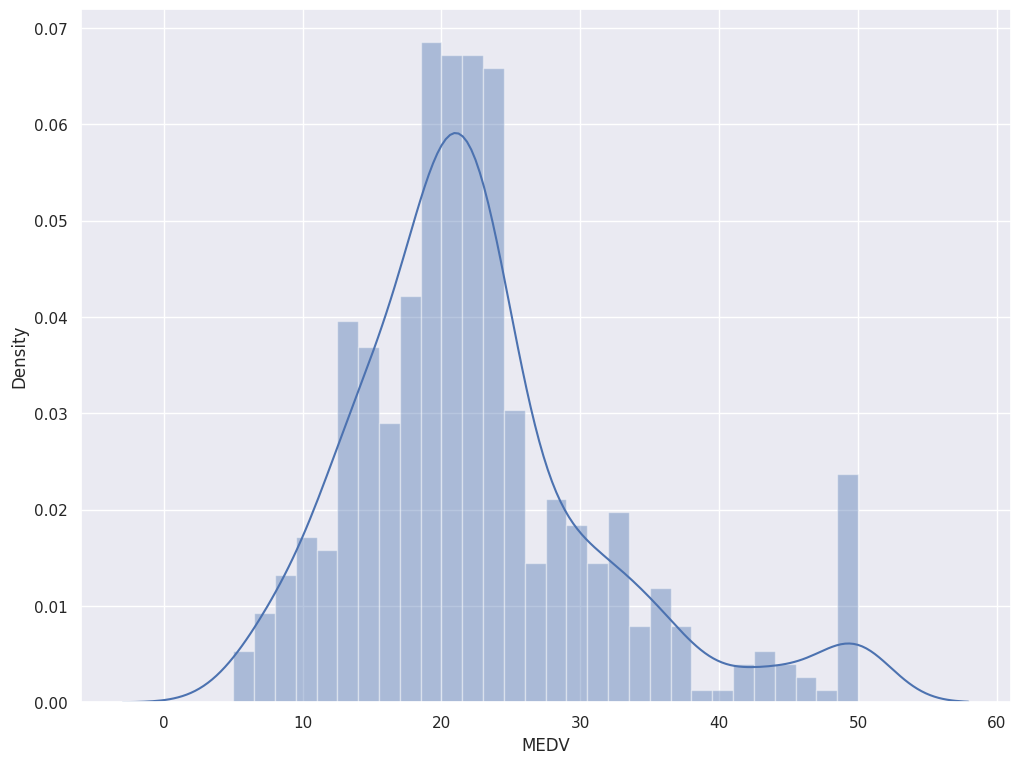

In [ ]:
# fix the figure size
sns.set(rc={'figure.figsize':(12,9)})

# Create a histogram that depicts the target values' distribution.
sns.distplot(df['MEDV'], bins=30)
plt.show()

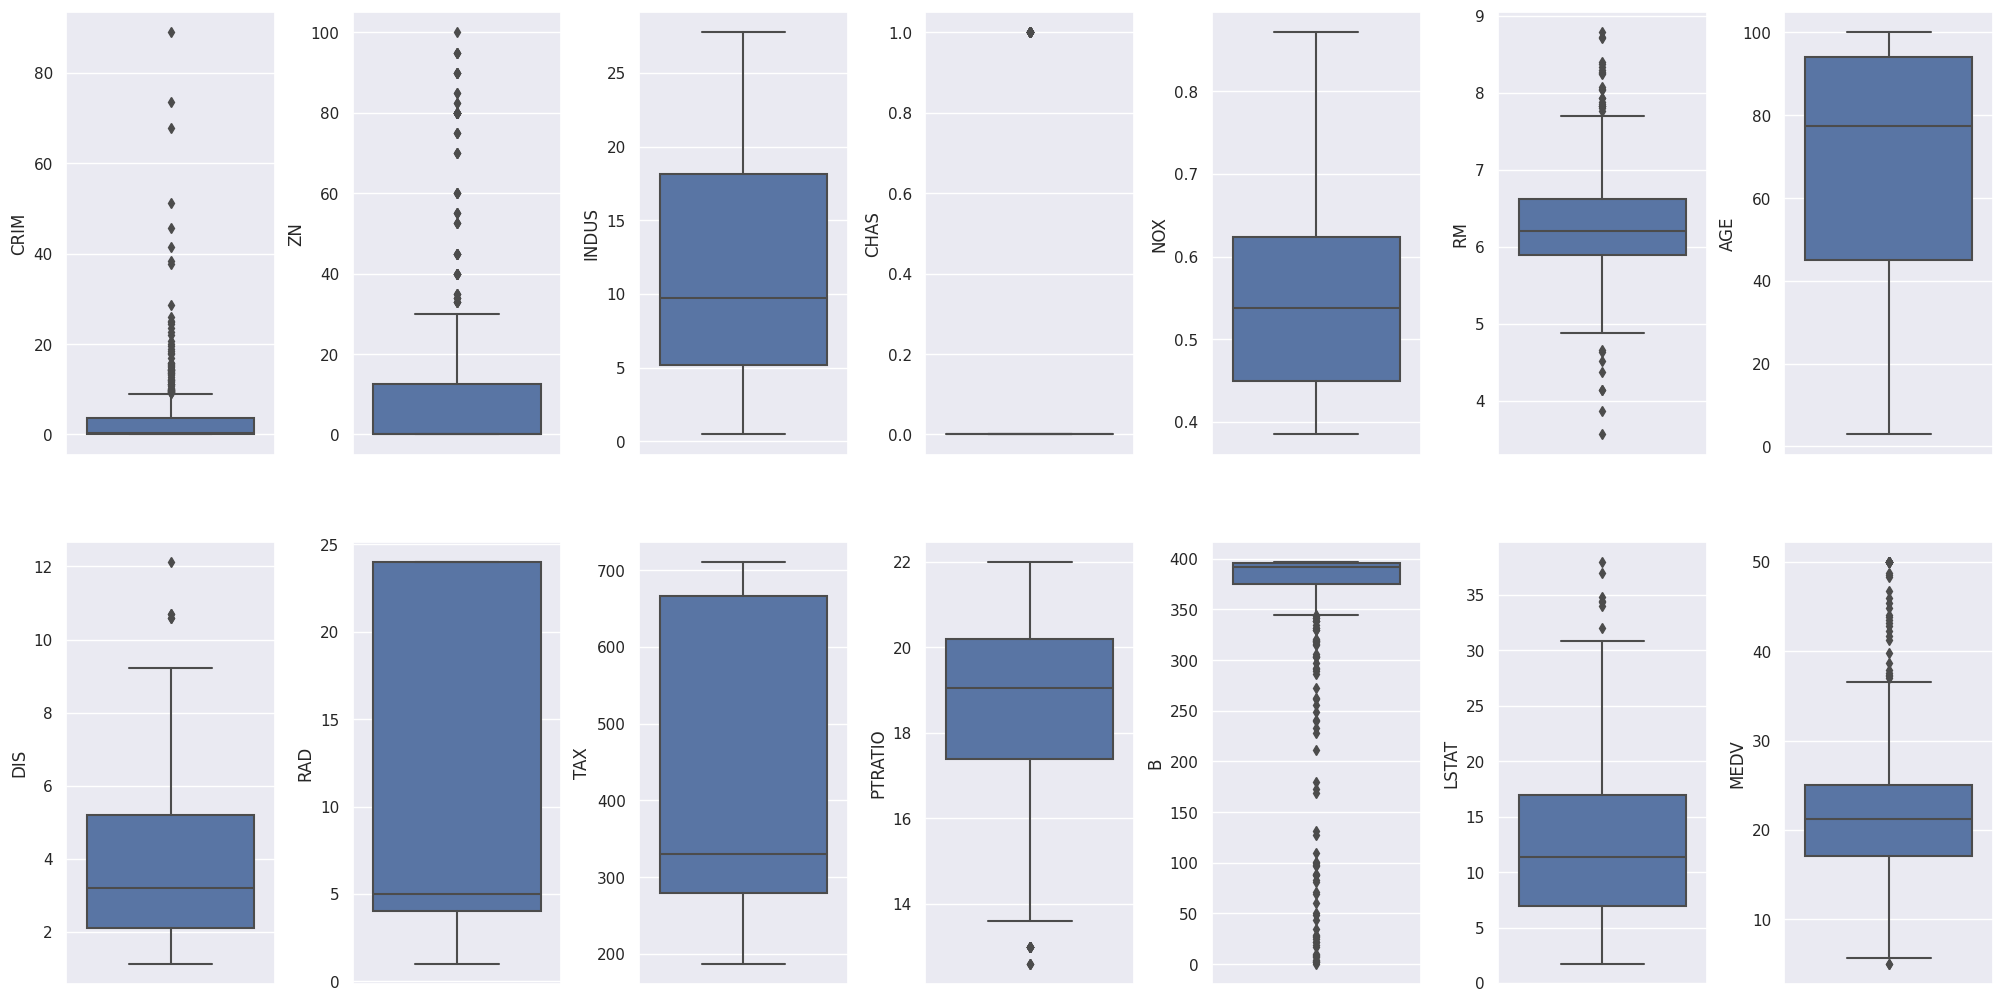

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)



---
#  Selected Features Visualization
---




<Axes: >

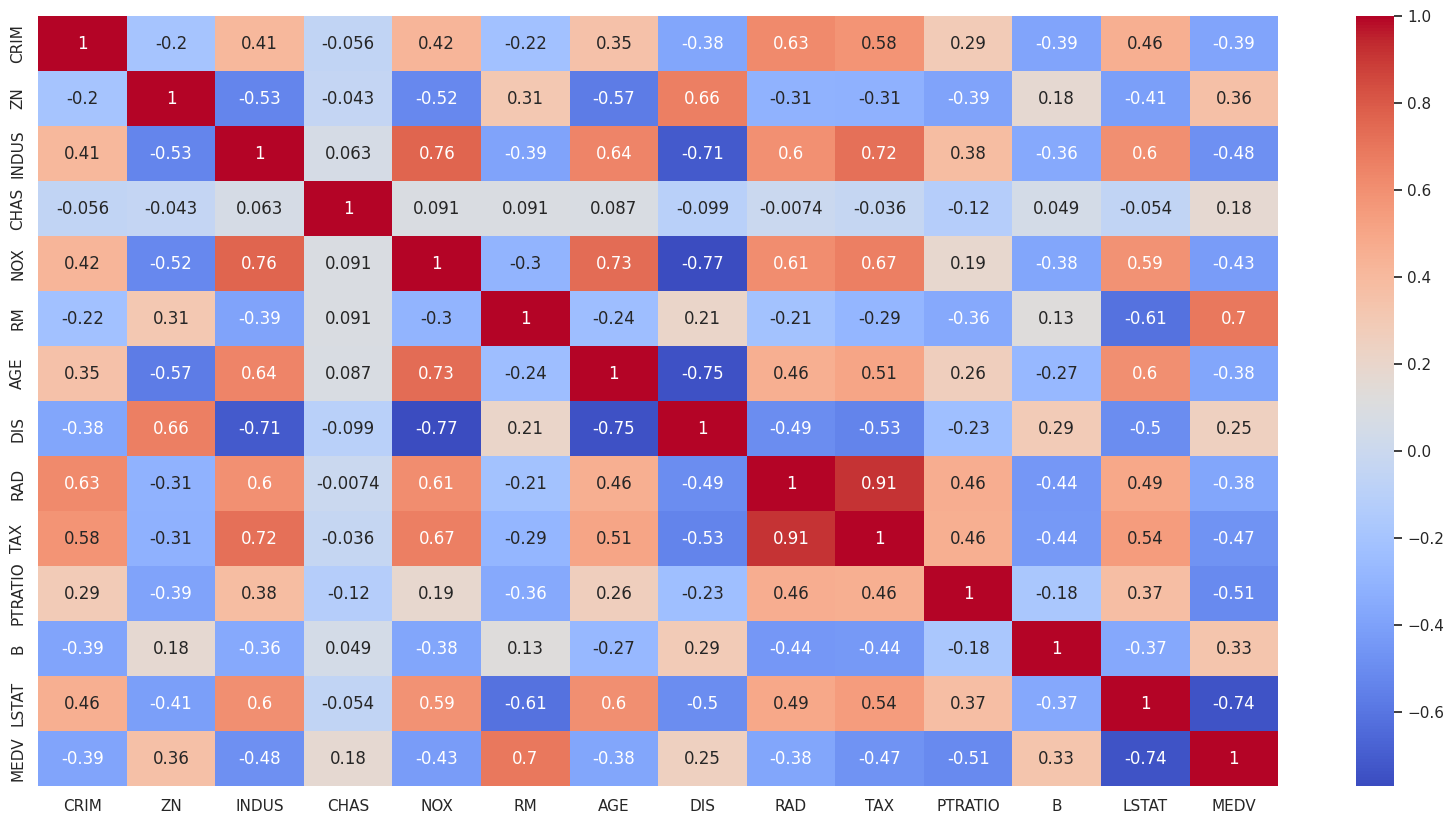

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

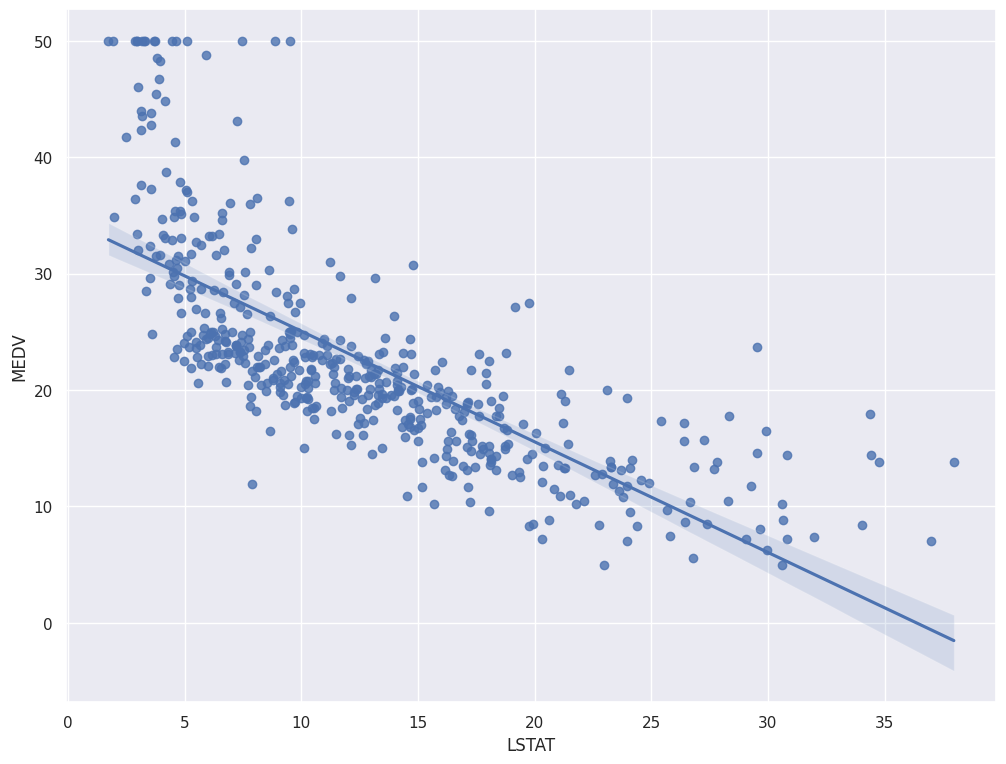

In [ ]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])



---
#  Model Training
---




In [ ]:
X = df.drop(columns=['MEDV', 'RAD', 'CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B'], axis=1)
y = df['MEDV']

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import math
def train(model, X, y):
    # train the model
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    model.fit(X_train, Y_train)

    # predict the training set
    pred = model.predict(X_test)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

    print("Model Report")
    print("MSE:",mean_squared_error(Y_test, pred))
    print('CV Score:', cv_score)
    print('Score:',model.score(X, y))
    print('Root Mean Square Error:', rmse)



Model Report
MSE: 27.114957415580577
CV Score: 34.10008149030682
Score: 0.677637988104822
Root Mean Square Error: 5.219059054240222


<Axes: title={'center': 'Model Coefficients'}>

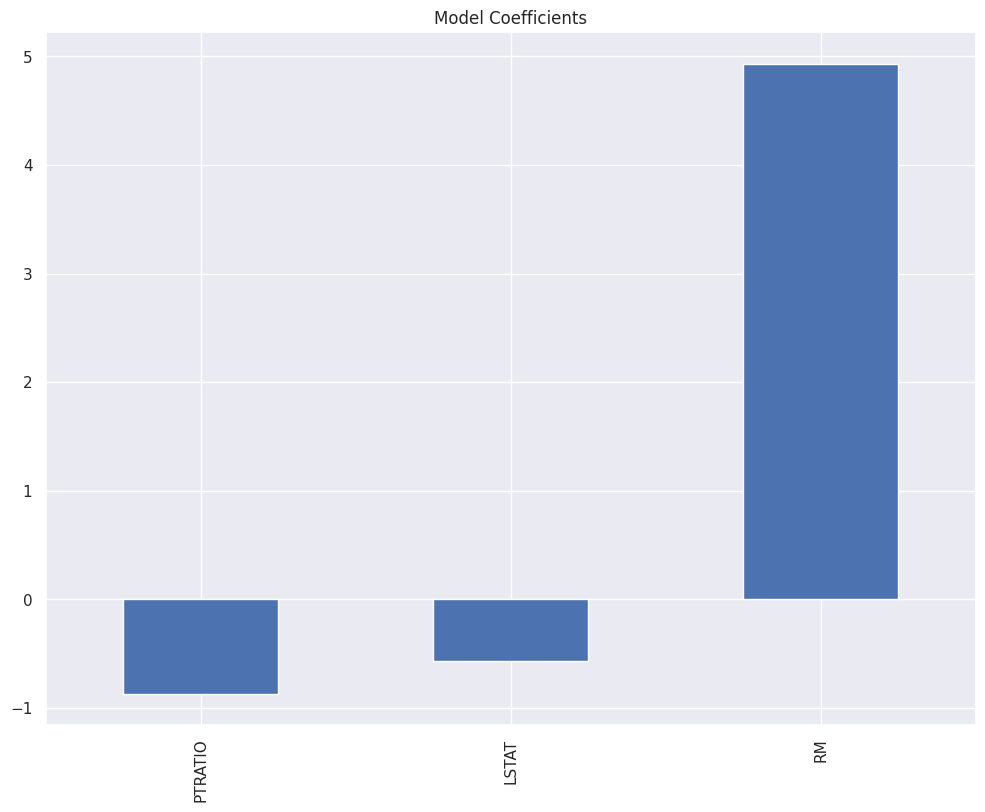

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')



---
#  Model Recommendations to Clients
---




In [ ]:
query_data = [[5, 17, 15], # Client 1
               [6, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(model.predict(query_data)):
    print( "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price*100))

Predicted selling price for Client 1's home: $1,600.62
Predicted selling price for Client 2's home: $396.30
Predicted selling price for Client 3's home: $4,464.63
